In [1]:
#!pip install torch torchvision numpy opencv-python segment_anything supervision shapely scipy pip install fiona rasterio

In [1]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import PIL
import glob
import os

import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from PIL import Image

PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


In [2]:
import subprocess

# Run the pip freeze command and capture the output
output = subprocess.check_output(['pip', 'freeze']).decode('utf-8')

# Split the output into individual lines
lines = output.strip().split('\n')

# Extract the package name and version from each line
packages = [line.split('==') for line in lines]

# Print the package names and versions
for package in packages:
    print(f"Package: {package[0]}\nVersion: {package[1]}\n")


Package: affine
Version: 2.4.0

Package: alphashape
Version: 1.3.1



IndexError: list index out of range

In [ ]:
import subprocess

# Run the pip freeze command and capture the output
output = subprocess.check_output(['pip', 'freeze']).decode('utf-8')

# Split the output into individual lines
lines = output.strip().split('\n')

# Extract the package name and version from each line
packages = [line.split('==') for line in lines]

# Print the package names and versions
for package in packages:
    print(f"Package: {package[0]}\nVersion: {package[1]}\n")


./dataset_images/image1.png


libpng warning: iCCP: known incorrect sRGB profile


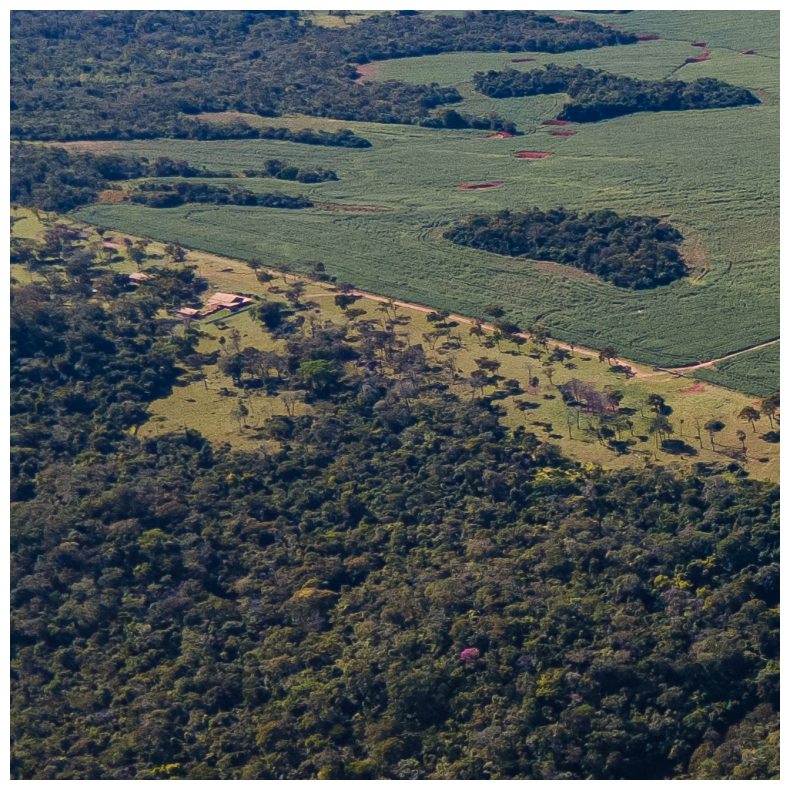

./dataset_images/image2.png


libpng warning: iCCP: known incorrect sRGB profile


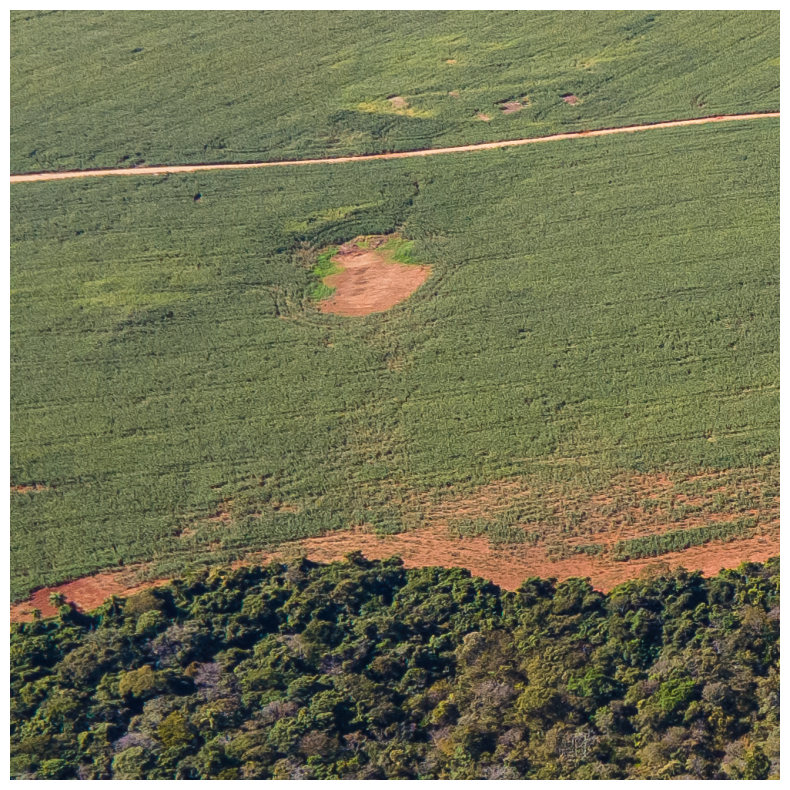

In [44]:
PATH_FOLDER_IMAGES = './dataset_images/'
PATH_FOLDER_ANN = './dataset_ann/'

arquivos = os.listdir(PATH_FOLDER_IMAGES)

caminhos_images = []
lista_imagens = []

# Itere sobre a lista de arquivos e imprima o nome de cada arquivo
for arquivo in arquivos:
    # Verifique se é um arquivo (e não uma subpasta)
    if os.path.isfile(os.path.join(PATH_FOLDER_IMAGES, arquivo)):
        final_name = PATH_FOLDER_IMAGES + arquivo
        print(final_name)
        path_image_i = final_name
        caminhos_images.append(path_image_i)
        image = cv2.imread(path_image_i)  #Try houses.jpg or neurons.jpg
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        lista_imagens.append(image)

        plt.figure(figsize=(10,10))
        plt.imshow(image)
        plt.axis('off')
        plt.show()

In [45]:
# import required module
from PIL import Image

for path_image_i in caminhos_images:
    # get image
    filepath = path_image_i
    img = Image.open(filepath)

    # get width and height
    width = img.width
    height = img.height

The height of the image is:  1000
The width of the image is:  1000
<class 'int'> 

The height of the image is:  1000
The width of the image is:  1000
<class 'int'> 



In [11]:
sam_checkpoint = "/home/wesley/josemartins/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [46]:
#There are several tunable parameters in automatic mask generation that control 
# how densely points are sampled and what the thresholds are for removing low 
# quality or duplicate masks. Additionally, generation can be automatically 
# run on crops of the image to get improved performance on smaller objects, 
# and post-processing can remove stray pixels and holes. 

mask_generator_ = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=20,
    pred_iou_thresh=0.95,     
    stability_score_thresh=0.95,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=300,  # Requires open-cv to run post-processing
)

lista_mascaras = []
for i, image in enumerate(lista_imagens):
    masks = mask_generator_.generate(image)
    mask_list = list(masks)
    lista_mascaras.append(mask_list)

Gerando mascaras para a imagem:  ./dataset_images/image1.png
[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 4714, 'bbox': [884, 431, 115, 71], 'predicted_iou': 0.9852617383003235, 'point_coords': [[966.5, 497.5]], 'stability_score': 0.9804457426071167, 'crop_box': [330, 330, 670, 670]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]]), 'area': 8244, 'b

Gerando mascaras para a imagem:  ./dataset_images/image2.png
[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 4486, 'bbox': [784, 659, 183, 55], 'predicted_iou': 0.9728870987892151, 'point_coords': [[832.5, 698.5]], 'stability_score': 0.9641216397285461, 'crop_box': [330, 330, 670, 670]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 956, 'bb

In [47]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

Gerando mascaras para a imagem:  ./dataset_images/image1.png


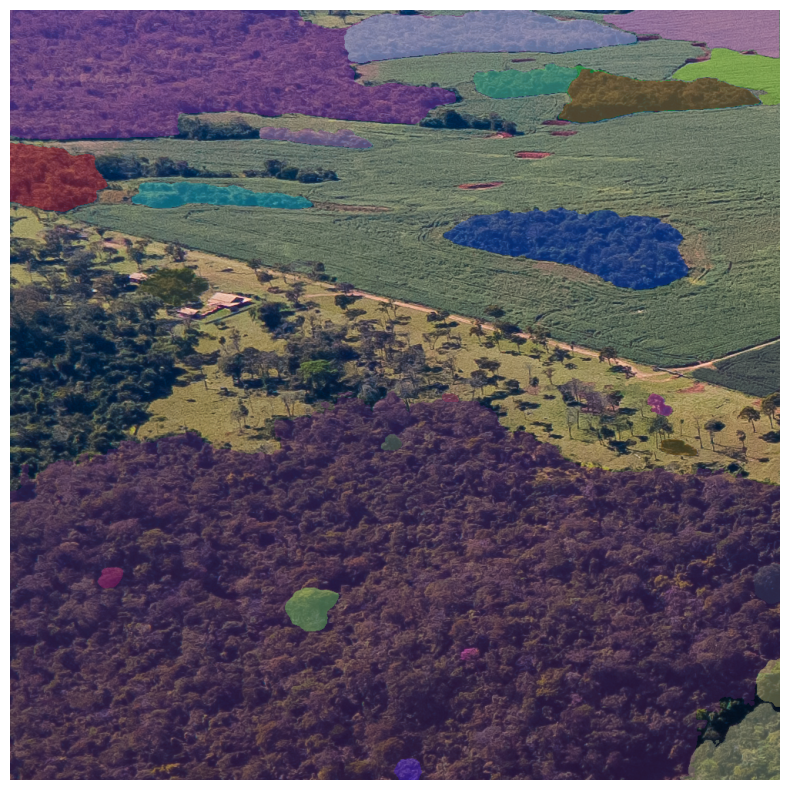

Gerando mascaras para a imagem:  ./dataset_images/image2.png


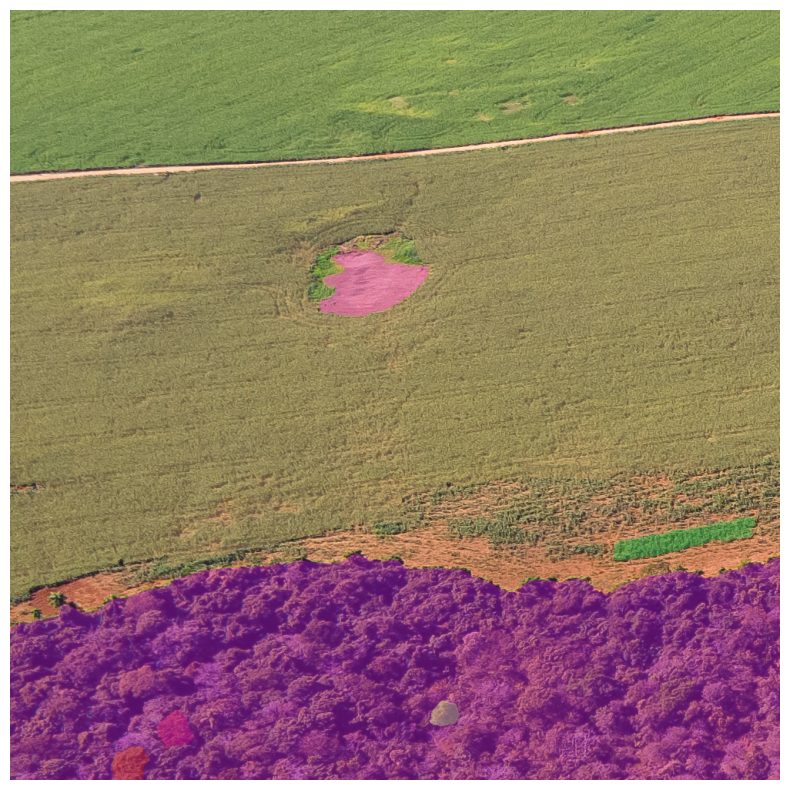

In [48]:
for i, image in enumerate(lista_imagens):    
    print("Gerando mascaras para a imagem: ", caminhos_images[i])
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_anns(lista_mascaras[i])
    plt.axis('off')
    plt.show() 

In [50]:
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon



def from_binary_image(img, simplify_tolerance=0.05):
    
    unique_values = np.unique(img.astype(np.uint8))
       
    shapes = [] 

    for cat in unique_values:
        if cat == 0: continue

        img_ = img.copy()
        img_[img_ != cat] = 0
        img_[img_ != 0] = 1
        contours, hierarchy = cv2.findContours(img_, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

        interiors = []
        index = []
        for c, contour in enumerate(contours):
            if hierarchy[0][c][3] != -1:
                interiors.append([(x[0][1], x[0][0]) for x in contour])
                index.append(hierarchy[0][c][3])

        for c, contour in enumerate(contours):
            if hierarchy[0][c][3] == -1:
                exterior = [(x[0][1], x[0][0]) for x in contour]
                interior = [hole for h, hole in enumerate(interiors) if index[h] == c]
                if len(exterior) <= 3: continue
                poly = Polygon(exterior, interior)
                poly = poly.simplify(tolerance=simplify_tolerance, preserve_topology=True)
                poly = poly.buffer(0)
                if not ( isinstance(poly, MultiPolygon)):
                    # print(type(poly))
                    shapes.append(poly)
    return shapes

In [55]:
import json
import base64

def convert_image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode('utf-8')
    return encoded_image

for i, file in enumerate(caminhos_images):
    data = file.split("/")
    image_name = data[2]
    
    nome_arquivo_sem_extencao = image_name.split(".")[0]

    # Define o nome do arquivo .json que será criado
    filename = PATH_FOLDER_ANN + nome_arquivo_sem_extencao + ".json"

    # Define o número de labels a serem geradas
    num_labels = len(lista_mascaras[i])

    # Cria uma lista vazia para armazenar as informações dos labels
    labels = []
    
    print('Gerando .JSON para:\nfilename: ', filename)
    print('num_labels: ', num_labels)
    print('image_name: ', image_name)
    
    
    for j in range(len(lista_mascaras[i])):
        shapes = from_binary_image(lista_mascaras[i][j]['segmentation'].astype(np.uint8), simplify_tolerance=2)
        for shape in shapes:
            #print("Classe: ", i)
            # print((i, shape.exterior.coords[:]))

            # Define o nome do label com base no valor de i
            label_name = f"label_{j}"

            # Define os pontos para o label com base no valor de i
            # pontos_array = class_points
            aux_pontos = [list(t) for t in shape.exterior.coords[:]]
            pontos = []
            for ponto in aux_pontos:
                pontos.append([ponto[1], ponto[0]])

            #print("aux_pontos: ", aux_pontos)
            #print("pontos: ", pontos)

            # Define as informações do label
            label_info = {
                "label": label_name,
                "points": pontos,
                "group_id": None,
                "description": "",
                "shape_type": "polygon",
                "flags": {}
            }

            # Adiciona o label à lista de labels
            labels.append(label_info)
    # Define as informações adicionais do arquivo
    print('file: ', file)
    # Specify the path to your image file
    image_path = file

    # Convert the image to Base64
    base64_image = convert_image_to_base64(image_path)

    # Print the Base64 encoded image
    # print(base64_image)
    info = {
        "version": "5.2.0.post4",
        "flags": {},
        "shapes": labels,
        "imagePath": file,
        "imageData": base64_image
    }
    # Cria o arquivo .json e adiciona as informações
    with open(filename, 'w') as outfile:
        print('JSON gerado para ', filename,'\n')
        json.dump(info, outfile)

Gerando .JSON para:
filename:  ./dataset_ann/image1.json
num_labels:  24
image_name:  image1.png
file:  ./dataset_images/image1.png
JSON gerado para  ./dataset_ann/image1.json 

Gerando .JSON para:
filename:  ./dataset_ann/image2.json
num_labels:  8
image_name:  image2.png
file:  ./dataset_images/image2.png
JSON gerado para  ./dataset_ann/image2.json 

